#### outlier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\user\Desktop\archive (1)\HollywoodsMostProfitableStories.csv")
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
...,...,...,...,...,...,...,...,...
69,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.367646,2008
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040000,2010
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.620000,2010


In [3]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


<Axes: >

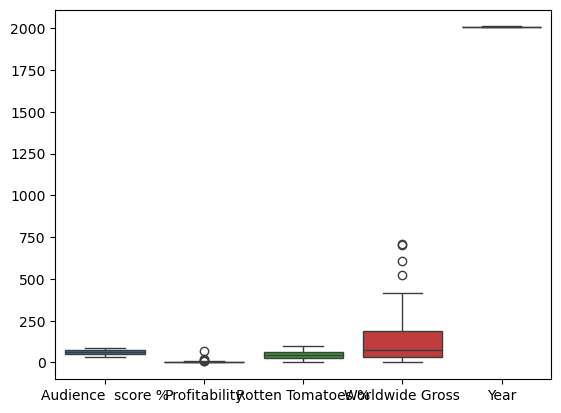

In [4]:
sns.boxplot(df)

<Axes: xlabel='Profitability', ylabel='Count'>

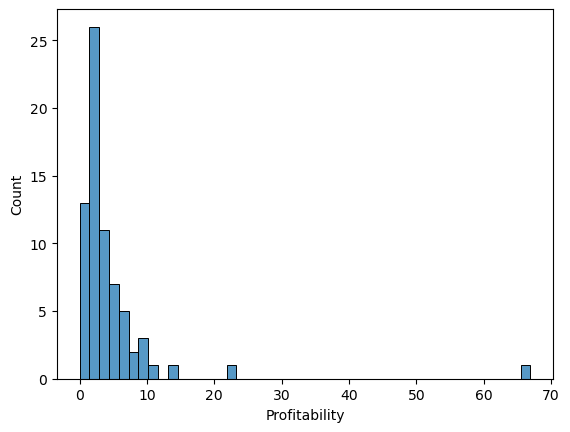

In [15]:
sns.histplot(df.Profitability)

In [19]:
df.Profitability.skew()

6.365099190101733

In [28]:
from scipy.stats import zscore
z_scores=zscore(df.Profitability)
z_scores

0     0.064425
1     0.394370
2    -0.522368
3    -0.050748
4    -0.497918
        ...   
68   -0.206760
69    0.175193
71   -0.430881
72   -0.445484
73   -0.366661
Name: Profitability, Length: 69, dtype: float64

In [24]:
df.dropna(inplace=True)

In [25]:
df.dropna(axis=1,inplace=True)

In [26]:
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
...,...,...,...,...,...,...,...,...
68,Water For Elephants,Drama,20th Century Fox,72.0,3.081421,60.0,117.094000,2011
69,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.367646,2008
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.620000,2010


In [29]:
threshold=2
outliers_index=df.index[(z_scores>threshold)|(z_scores<-threshold)]
outliers_index

Index([8, 15], dtype='int64')

In [30]:
df.drop(outliers_index,inplace=True)
df.head(20)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
5,Beginners,Comedy,Independent,80.0,4.471875,84.0,14.310000,2011
6,Dear John,Drama,Sony,66.0,4.598800,29.0,114.970000,2010
7,Enchanted,Comedy,Disney,80.0,4.005737,93.0,340.487652,2007
9,Four Christmases,Comedy,Warner Bros.,52.0,2.022925,26.0,161.834000,2008
10,Ghosts of Girlfriends Past,Comedy,Warner Bros.,47.0,2.044400,27.0,102.220000,2009


<Axes: >

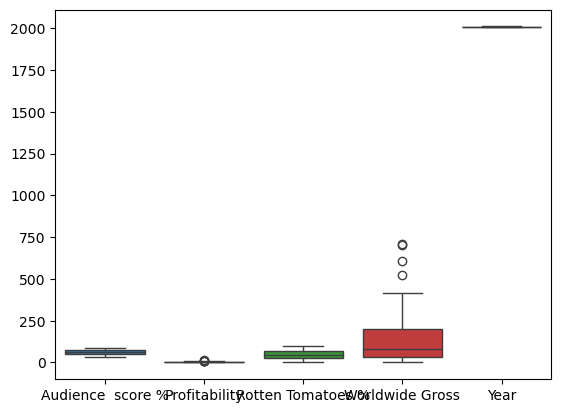

In [31]:
sns.boxplot(df)

In [32]:
q1=np.percentile(df.Profitability,25)
q2=np.percentile(df.Profitability,50)
q3=np.percentile(df.Profitability,75)
iqr=q3-q1
iqr

2.7446572915

In [33]:
low_lim=q1-1.5*iqr
upp_lim=q3+1.5*iqr
print(low_lim)
print(upp_lim)

-2.32630572875
8.65232343725


In [35]:
outliers=[]
for i in df.Profitability:
    if((i<low_lim)or(i>upp_lim)):
        outliers.append(i)
outliers

[9.234453864, 8.744705882, 14.1964, 10.18002703, 11.0897415]

In [36]:
df.Profitability=df.Profitability.clip(lower=low_lim,upper=upp_lim)

<Axes: >

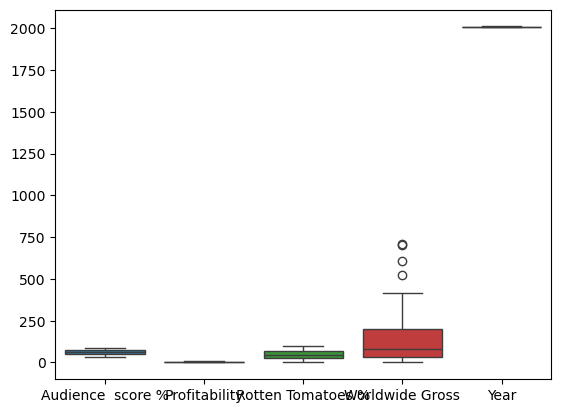

In [37]:
sns.boxplot(df)

In [38]:
df.duplicated().sum()

0

In [39]:
df.drop_duplicates()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
...,...,...,...,...,...,...,...,...
68,Water For Elephants,Drama,20th Century Fox,72.0,3.081421,60.0,117.094000,2011
69,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.367646,2008
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.620000,2010
